<a href="https://colab.research.google.com/github/mava123-0/Machine-Learning-Projects/blob/main/Deep%20Learning/Convolutional%20Neural%20Network/CIFAR10%20Image%20Classification/CNN_CIFAR10_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [46]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [47]:
x_test.shape

(10000, 32, 32, 3)

In [48]:
y_train.shape

(50000, 1)

In [49]:
y_train[::5] # classification index

array([[6],
       [1],
       [4],
       ...,
       [8],
       [4],
       [2]], dtype=uint8)

In [67]:
#reshape y_train
#keep first dimension same (no of imgs) or give (-1,); second one should be flattened
#so leave it blank
y_train = y_train.reshape(50000,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [68]:
y_test = y_test.reshape(-1,)

In [51]:
#value of classes in y
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [52]:
def plot_sample(x,y,index):
  plt.figure(figsize = (15,2)) #change the size of image to smaller one
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

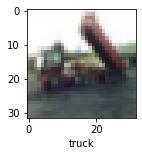

In [53]:
plot_sample(x_train,y_train,2)

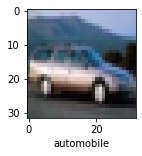

In [54]:
plot_sample(x_train,y_train,4)

**Normalize Data**

Divide each pixel value by 255, since each have a range from 0 to 255 for each channel. Normalizing with 255, changes the range to between 0 and 1.

In [55]:
x_train = x_train/255
x_test = x_test/255

**Create Model**

In [56]:
cnn = models.Sequential([
    #filter size is kernel size - 3 by 3 
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    #2 by 2 filter
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    #no need to give shape, network automatically finds out
    layers.Flatten(),
    #CNN does not need many deep layers and neurons
    layers.Dense(64,activation = 'relu'),
    #softmax normalizes the probability
    layers.Dense(10,activation = 'softmax')
])

In [57]:
cnn.compile(optimizer = 'adam',
            #sparse_cat_crossover used since the values for y are integers; if categorical -> categorical_crossentropy    
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy']) 

In [58]:
 cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4797 - accuracy: 0.4688
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1364 - accuracy: 0.6016
Epoch 3/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.0223 - accuracy: 0.6417
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9460 - accuracy: 0.6699
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8915 - accuracy: 0.6886
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8472 - accuracy: 0.7056
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8023 - accuracy: 0.7203
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7676 - accuracy: 0.7319
Epoch 9/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7352 - accuracy: 0.7423
Epoch 10/10
1563/1563 [==============================] - 80s 51m

In [60]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9784 - accuracy: 0.6808


[0.9784400463104248, 0.6808000206947327]

68% accuracy on cnn with optimizer = adam that was trained for 10 epochs

In [61]:
cnn_sgd = models.Sequential([
    #filter size is kernel size - 3 by 3 
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    #2 by 2 filter
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    #no need to give shape, network automatically finds out
    layers.Flatten(),
    #CNN does not need many deep layers and neurons
    layers.Dense(64,activation = 'relu'),
    #softmax normalizes the probability
    layers.Dense(10,activation = 'softmax')
])

In [62]:
cnn_sgd.compile(optimizer = 'SGD',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [65]:
cnn_sgd.fit(x_test,y_test,epochs = 10)

Epoch 1/10
313/313 [==============================] - 12s 38ms/step - loss: 1.7260 - accuracy: 0.3812
Epoch 2/10
313/313 [==============================] - 13s 41ms/step - loss: 1.6612 - accuracy: 0.4072
Epoch 3/10
313/313 [==============================] - 13s 40ms/step - loss: 1.6114 - accuracy: 0.4204
Epoch 4/10
313/313 [==============================] - 11s 35ms/step - loss: 1.5714 - accuracy: 0.4401
Epoch 5/10
313/313 [==============================] - 11s 36ms/step - loss: 1.5350 - accuracy: 0.4423
Epoch 6/10
313/313 [==============================] - 11s 35ms/step - loss: 1.5004 - accuracy: 0.4558
Epoch 7/10
313/313 [==============================] - 12s 38ms/step - loss: 1.4731 - accuracy: 0.4752
Epoch 8/10
313/313 [==============================] - 13s 42ms/step - loss: 1.4411 - accuracy: 0.4853
Epoch 9/10
313/313 [==============================] - 11s 36ms/step - loss: 1.4185 - accuracy: 0.4913
Epoch 10/10
313/313 [==============================] - 11s 36ms/step - loss: 1.393

In [66]:
cnn_sgd.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.3597 - accuracy: 0.5123


[1.359748363494873, 0.5123000144958496]

32% accuracy on cnn with optimizer = SGD that was trained for 10 epochs

**Predicting using the model**

In [69]:
y_pred = cnn.predict(x_test)
y_pred[:5]
# here y_pred is a list of lists with the probability distribution
# for each input of y_test, so find the index of the max value 
# in each list to get the class of the item. 

313/313 [==============================] - 4s 14ms/step


array([[6.5944268e-04, 4.7347182e-04, 8.1095044e-05, 5.9817302e-01,
        2.0377135e-03, 2.9514459e-01, 6.3769534e-02, 5.3535161e-05,
        3.9172072e-02, 4.3555067e-04],
       [2.4636062e-03, 5.7938439e-04, 1.2541136e-07, 1.5123133e-08,
        8.5667928e-08, 9.2952500e-11, 5.8643861e-11, 6.3334502e-09,
        9.9688226e-01, 7.4559845e-05],
       [2.4393838e-02, 4.2398028e-02, 5.0485937e-04, 6.2241917e-03,
        1.5985565e-03, 1.7481967e-04, 3.7345701e-05, 9.6405152e-04,
        8.7624967e-01, 4.7454704e-02],
       [9.3448275e-01, 2.8365862e-03, 1.3188075e-03, 8.2097386e-06,
        2.3462935e-03, 2.1609716e-07, 3.1270771e-04, 7.1506843e-06,
        5.8208205e-02, 4.7905438e-04],
       [1.6344909e-06, 1.0058947e-05, 4.3741416e-04, 6.1618020e-03,
        4.4203815e-01, 4.9190745e-03, 5.4641509e-01, 1.1786035e-05,
        4.9970720e-07, 4.4178964e-06]], dtype=float32)

Predictions:

Predicted: cat | Actual Value: cat
Predicted: ship | Actual Value: ship
Predicted: ship | Actual Value: ship
Predicted: airplane | Actual Value: airplane
Predicted: frog | Actual Value: frog


Images:



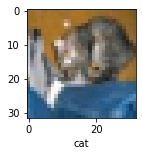

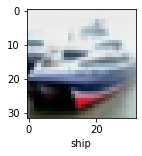

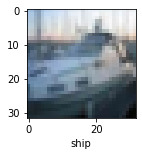

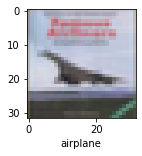

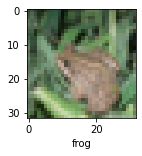

In [84]:
# argmax returns the index of the max value in a list
index = 0
print("Predictions:\n")
for item in y_pred[:5]:
  max_index = np.argmax(item)
  plot_sample(x_test, y_test, index)
  print("Predicted:",classes[max_index],"| Actual Value:",classes[y_test[index]])
  index += 1
  if (index == 5):
    print("\n\nImages:\n")